#  Preprocessing for Machine Learning in Python
Sarah Guido

## Introduction to Data Preprocessing 

### What is data preprocessing 

What is data preprocessing?
- Beyond cleaning and exploratory data analysis
- Prepping data for modeling
- Modeling in Python requires numerical input

Refresher on Pandas basics

In [ ]:
import pandas as pd
hiking = pd.read_json("datasets/hiking.json")
print(hiking.head())

#   Accessible Difficulty Length Limited_Access
# 0 Y None 0.8 miles N
# 1 N Easy 1.0 mile N
# 2 N Easy 0.75 miles N
# 3 N Easy 0.5 miles N
# 4 N Easy 0.5 miles N

Refresher on Pandas basics

In [ ]:
print(hiking.columns)

# Index(['Accessible','Difficulty','Length',
#        'Limited_Access','Location','Name',
#        'Other_Details','Park_Name','Prop_ID',
#        'lat','lon'],
# dtype='object')

In [ ]:
print(hiking.dtypes)
# Accessible object
# Difficulty object
# Length object
# Limited_Access object
# Location object
# Name object
# Other_Details object
# Park_Name object
# Prop_ID object
# lat float64
# lon float64
# dtype: object

Refresher on Pandas basics

In [ ]:
print(wine.describe())
#      Type Alcohol ... Alcalinity of ash
# count 178.000000 178.000000 ... 178.000000
# mean 1.938202 13.000618 ... 19.494944
# std 0.775035 0.811827 ... 3.339564
# min 1.000000 11.030000 ... 10.600000
# 25% 1.000000 12.362500 ... 17.200000
# 50% 2.000000 13.050000 ... 19.500000
# 75% 3.000000 13.677500 ... 21.500000
# max 3.000000 14.830000 ... 30.000000

Removing missing data

In [ ]:
print(df)
#    A   B   C
# 0 1.0 NaN 2.0
# 1 4.0 7.0 3.0
# 2 7.0 NaN NaN
# 3 NaN 7.0 NaN
# 4 5.0 9.0 7.0

print(df.dropna())
#     A B C
# 1 4.0 7.0 3.0
# 4 5.0 9.0 7.0

print(df.drop([1, 2, 3]))
# A B C
# 0 1.0 NaN 2.0
# 4 5.0 9.0 7.0

print(df.drop("A", axis=1))
#    B   C
# 0 NaN 2.0
# 1 7.0 3.0
# 2 NaN NaN
# 3 7.0 NaN
# 4 9.0 7.0

print(df[df["B"] == 7])
# A B C
# 1 4.0 7.0 3.0
# 3 NaN 7.0 NaN

print(df["B"].isnull().sum())
# 2

print(df[df["B"].notnull()])
#    A   B   C
# 1 4.0 7.0 3.0
# 3 NaN 7.0 NaN
# 4 5.0 9.0 7.0

In [ ]:
#Example
# Check how many values are missing in the category_desc column
print(volunteer["category_desc"].isnull().sum())

# Subset the volunteer dataset
volunteer_subset = volunteer[volunteer["category_desc"].notnull()]

# Print out the shape of the subset
print(volunteer_subset.shape)

### Working with data types 

Why are types important?

- object: string/mixed types
- int64: integer
- float64: float
- datetime64 (or timedelta): datetime

In [ ]:
print(volunteer.dtypes)
# opportunity_id int64
# content_
# id int64
# vol_requests int64
# ... ...
# summary object
# is_priority object
# category_id float64

Converting column types

In [ ]:
print(df)
#   A    B    C
# 0 1 string 1.0
# 1 2 string2 2.0
# 2 3 string3 3.0

print(df.dtypes)
# A int64
# B object
# C object
# dtype: object

df["C"] = df["C"].astype("float")
print(df.dtypes)
# A int64
# B object
# C float64
# dtype: object

In [ ]:
#Example
# Print the head of the hits column
print(volunteer["hits"].head())

# Convert the hits column to type int
volunteer["hits"] = volunteer["hits"].astype("int")

# Look at the dtypes of the dataset
print(volunteer.dtypes)

### Class distribution (Training and Test Sets)

Splitting up your dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# X_train y_train
# 0 1.0 n
# 1 4.0 n
# ...
# 5 5.0 n
# 6 6.0 n

# X_test y_test
# 0 9.0 y
# 1 1.0 n
# 2 4.0 n

Stratified sampling
- 100 samples, 80 class 1 and 20 class 2
- Training set: 75 samples, 60 class 1 and 15 class 2
- Test set: 25 samples, 20 class 1 and 5 class 2

In [ ]:
# Total "labels" counts
y["labels"].value_counts()
# class1 80
# class2 20
# Name: labels, dtype: int64

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [ ]:
y_train["labels"].value_counts()
# class1 60
# class2 15
# Name: labels, dtype: int64
        
y_test["labels"].value_counts()
# class1 20
# class2 5
# Name: labels, dtype: int64

In [ ]:
#Example
# Create a data with all columns except category_desc
volunteer_X = volunteer.drop("category_desc", axis=1)

# Create a category_desc labels dataset
volunteer_y = volunteer[["category_desc"]]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_test, y_train, y_test = train_test_split(volunteer_X, volunteer_y, stratify = volunteer_y)

# Print out the category_desc counts on the training y labels
print(y_train["category_desc"].value_counts())

## Standardizing Data 

### Standardizing Data 

What is standardization? (transform continuous data to be normally distributed)
- Scikit-learn models assume normally distributed data
- Log normalization and feature scaling in this course
- Applied to continuous numerical data

When to standardize: models
- Model in linear space (knn, linear regression, kmeans)
- Dataset features have high variance
- Dataset features are continuous and on different scales
- Linearity assumptions

In [ ]:
#Example
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

### Log normalization 

What is log normalization? (used for high variance!)
- Applies log transformation
- Natural log using the constant _e_ (2.718)
- Captures relative changes, the magnitude of change, and keeps everything in the positive space

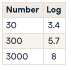

Log normalization in Python

In [ ]:
print(df)
#   col1 col2
# 0 1.00 3.0
# 1 1.20 45.5
# 2 0.75 28.0
# 3 1.60 100.0

print(df.var())
# col1 0.128958
# col2 1691.729167
# dtype: float64
    
import numpy as np
df["log_2"] = np.log(df["col2"])

print(df)
#   col1 col2 log_2
# 0 1.00 3.0 1.098612
# 1 1.20 45.5 3.817712
# 2 0.75 28.0 3.332205
# 3 1.60 100.0 4.605170

print(np.var(df[["col1", "log_2"]])) #variances much closer together now
# col1 0.096719
# log_2 1.697165
# dtype: float64

In [ ]:
#Example
# Print out the variance of the Proline column
print(wine["Proline"].var())

# Apply the log normalization function to the Proline column
wine["Proline_log"] = np.log(wine["Proline"])

# Check the variance of the normalized Proline column
print(np.var(wine["Proline_log"]))

### Scaling data for feature comparison 

What is feature scaling?
- Features on different scales
- Model with linear characteristics
- Center features around 0 and transform to unit variance (compare features linearly)
- Transforms to approximately normal distribution

How to scale data

In [ ]:
print(df)
#   col1 col2 col3
# 0 1.00 48.0 100.0
# 1 1.20 45.5 101.3
# 2 0.75 46.2 103.5
# 3 1.60 50.0 104.0

print(df.var())
# col1 0.128958
# col2 4.055833
# col3 3.526667
# dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),
                         columns=df.columns)

In [ ]:
print(df_scaled)
# col1 col2 col3
# 0 -0.442127 0.329683 -1.352726
# 1 0.200967 -1.103723 -0.553388
# 2 -1.245995 -0.702369 0.799338
# 3 1.487156 1.476409 1.106776

In [ ]:
print(df.var())
# col1 1.333333
# col2 1.333333
# col3 1.333333
# dtype: float64

In [ ]:
#Example
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create the scaler
ss = StandardScaler()

# Take a subset of the DataFrame you want to scale 
wine_subset = wine[["Ash", "Alcalinity of ash", "Magnesium"]]

# Apply the scaler to the DataFrame subset
wine_subset_scaled = ss.fit_transform(wine_subset)

# Good job! In scikit-learn, running fit_transform during 
# preprocessing will both fit the method to the data as well 
# as transform the data in a single step.

### Standardized data and modeling 

K-nearest neighbors

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing first
X_train, X_test, y_train, y_test = train_test_split(X, y)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

In [ ]:
#Example
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# Score the model on the test data
print(knn.score(X_test, y_test))

# <script.py> output:
#     0.6444444444444445

In [ ]:
#Example
# Create the scaling method.
ss = StandardScaler()

# Apply the scaling method to the dataset used for modeling.
X_scaled = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

# Score the model on the test data.
print(knn.score(X_test, y_test))

## Feature Engineering 

### Feature engineering 

What is feature engineering?
- Creation of new features based on existing features
- Insight into relationships between features
- Extract and expand data
- Dataset-dependent

Feature engineering scenarios
- text and string transformation
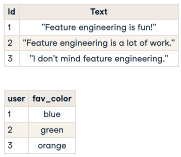
- dates and usage of average
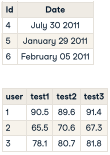

### Encoding categorical variables 

Categorical variables

In [ ]:
#   user subscribed fav_color
# 0 1        y blue
# 1 2        n green
# 2 3        n orange
# 3 4        y green

Encoding binary variables - Pandas

In [ ]:
print(users["subscribed"])
# 0 y
# 1 n
# 2 n
# 3 y
# Name: subscribed, dtype: object

print(users[["subscribed", "sub_enc"]])
# subscribed sub_enc
# 0 y 1
# 1 n 0
# 2 n 0
# 3 y 1

users["sub_enc"] = users["subscribed"].apply(lambda val:1 if val == "y" else 0)

Encoding binary variables - scikit-learn

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
users["sub_enc_le"] = le.fit_transform(users["subscribed"])

print(users[["subscribed","sub_enc_le"]])
# subscribed sub_enc_le
# 0 y           1
# 1 n           0
# 2 n           0
# 3 y           1

One-hot encoding

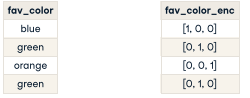

Values: [blue, green, orange]
- blue: [1, 0, 0]
- green: [0, 1, 0]
- orange: [0, 0, 1]

In [ ]:
print(users["fav_color"])
# 0 blue
# 1 green
# 2 orange
# 3 green
# Name: fav_color, dtype: object

print(pd.get_dummies(users["fav_color"]))
# blue green orange
# 0 1 0 0
# 1 0 1 0
# 2 0 0 1
# 3 0 1 0

In [ ]:
#Example
# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking["Accessible_enc"] = enc.fit_transform(hiking["Accessible"])

# Compare the two columns
print(hiking[["Accessible", "Accessible_enc"]].head()) #no column for 0 and other for 1

In [ ]:
#Example
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer["category_desc"])

# Take a look at the encoded columns
print(category_enc.head())

### Engineering numerical features 

In [ ]:
print(df)
# city day1 day2 day3
# 0 NYC 68.3 67.9 67.8
# 1 SF 75.1 75.5 74.9
# 2 LA 80.3 84.0 81.3
# 3 Boston 63.0 61.0 61.2

columns = ["day1","day2","day3"]
df["mean"] = df.apply(lambda row: row[columns].mean(), axis=1)
print(df)
# city day1 day2 day3 mean
# 0 NYC 68.3 67.9 67.8 68.00
# 1 SF 75.1 75.5 74.9 75.17
# 2 LA 80.3 84.0 81.3 81.87
# 3 Boston 63.0 61.0 61.2 61.7

Dates

In [ ]:
print(df)
#       date     purchase
# 0 July 30 2011 $45.08
# 1 February 01 2011 $19.48
# 2 January 29 2011 $76.09
# 3 March 31 2012 $32.61
# 4 February 05 2011 $75.98

In [ ]:
df["date_converted"] = pd.to_datetime(df["date"])
df["month"] = df["date_converted"].apply(lambda row: row.month)
print(df)

#   date purchase date_converted month
# 0 July 30 2011 $45.08 2011-07-30 7
# 1 February 01 2011 $19.48 2011-02-01 2
# 2 January 29 2011 $76.09 2011-01-29 1
# 3 March 31 2012 $32.61 2012-03-31 3
# 4 February 05 2011 $75.98 2011-02-05 2

In [ ]:
#Example
# Create a list of the columns to average
run_columns = ["run1", "run2", "run3", "run4", "run5"]

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)

In [ ]:
#Example
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
print(volunteer[["start_date_converted", "start_date_month"]].head())

### Engineering features from text

Extraction

In [ ]:
import re #regular expression are used to extract patterns from text data
my_string = "temperature:75.6 F"
pattern = re.compile("\d+\.\d+") 
temp = re.match(pattern, my_string)
print(float(temp.group(0))
# 75.6

- \d+ | digits (as many as possible)
- \. | grab decimal point
- \d+ | grab digits after .

Vectorizing text (terms more relevant)
- tf = term frequency
- idf = inverse document frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
print(documents.head())

# 0 Building on successful events last summer and ...
# 1 Build a website for an Afghan business
# 2 Please join us and the students from Mott Hall...
# 3 The Oxfam Action Corps is a group of dedicated...
# 4 Stop 'N' Swap reduces NYC's waste by finding n...

In [ ]:
tfidf_vec = TfidfVectorizer()
text_tfidf = tfidf_vec.fit_transform(documents)

Text classification
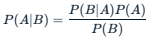

In [ ]:
#Example
# Write a pattern to extract numbers and decimals
def return_mileage(length):
    pattern = re.compile(r"\d+\.\d+")
    
    # Search the text for matches
    mile = re.match(pattern, length)
    
    # If a value is returned, use group(0) to return the found value
    if mile is not None:
        return float(mile.group(0))
        
# Apply the function to the Length column and take a look at both columns
hiking["Length_num"] = hiking["Length"].apply(lambda row: return_mileage(row))
print(hiking[["Length", "Length_num"]].head())

# <script.py> output:
#            Length  Length_num
#     0   0.8 miles        0.80
#     1    1.0 mile        1.00
#     2  0.75 miles        0.75
#     3   0.5 miles        0.50
#     4   0.5 miles        0.50

In [ ]:
#Example
# Take the title text
title_text = volunteer["title"]

# Create the vectorizer method
tfidf_vec = TfidfVectorizer()

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit_transform(title_text)
print(text_tfidf)
# <script.py> output:
#       (0, 375)	0.3163915503784279
#       (0, 855)	0.38192461589865456
#       (0, 493)	0.3405778550191958
#       (0, 822)	0.38192461589865456
#       (0, 959)	0.38192461589865456
# ...

In [ ]:
#Example
# Split the dataset according to the class distribution of category_desc
y = volunteer["category_desc"]
X_train, X_test, y_train, y_test = train_test_split(text_tfidf.toarray(), y, stratify=y)

# Fit the model to the training data
nb.fit(X_train, y_train)

# Print out the model's accuracy
print(nb.score(X_test, y_test))
# <script.py> output:
#     0.567741935483871

## Selecting features for modeling 

### Feature selection

What is feature selection?
- Selecting features to be used for modeling
- Doesn't create new features
- Improve model's performance


- feature engineering create new features. feature selection improves performance of models
- it is possible to create univariate statistical tests, for example. (scikit helps)

When to select features
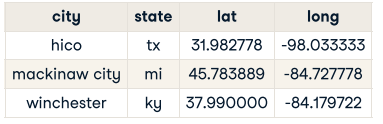

### Removing redundant features 

Redundant features
- Remove noisy features
- Remove correlated features
- Remove duplicated 

- some can be treated just by knowing what features you have in your dataset

Scenarios for manual removal
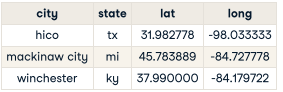

Correlated features
- Statistically correlated: features move together directionally
- Linear models assume feature independence
- Pearson correlation coefficient

Correlated features

In [ ]:
print(df)
#    A    B    C
# 0 3.06 3.92 1.04
# 1 2.76 3.40 1.05
# 2 3.24 3.17 1.03
# ...

print(df.corr())
#       A        B        C
# A 1.000000 0.787194 0.543479
# B 0.787194 1.000000 0.565468
# C 0.543479 0.565468 1.000000

In [ ]:
#Example
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
print(volunteer_subset.head())

In [ ]:
#Example
# Print out the column correlations of the wine dataset
print(wine.corr())

# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = "Flavanoids"

# Drop that column from the DataFrame
wine = wine.drop("Flavanoids", axis = 1)

### Selecting features using text vectors 

Important to test different factors

Looking at word weights

In [ ]:
print(tfidf_vec.vocabulary_)
# {'200': 0,
# '204th': 1,
# '33rd': 2,
# 'ahead': 3,
# 'alley': 4,
# ...

print(text_tfidf[3].data)
# [0.19392702 0.20261085 0.24915
# 0.31957651 0.18599931 ...]

print(text_tfidf[3].indices)
# [ 31 102 20 70 5 ...]

In [ ]:
vocab = {v:k for k,v in
         tfidf_vec.vocabulary_.items()}
print(vocab)
# {0: '200',
#  1: '204th',
#  2: '33rd',
#  3: 'ahead',
#  4: 'alley',
#  ...
  
zipped_row =dict(zip(text_tfidf[3].indices,
                     text_tfidf[3].data))
print(zipped_row)
# {5: 0.1597882543332701,
# 7: 0.26576432098763175,
# 8: 0.18599931331925676,
# 9: 0.26576432098763175,
# 10: 0.13077355258450366,
# ...

In [ ]:
def return_weights(vocab, vector, vector_index):

    zipped = dict(zip(vector[vector_index].indices,
                      vector[vector_index].data))

    return {vocab[i]:zipped[i] for i in vector[vector_index].indices}

print(return_weights(vocab, text_tfidf, 3))
# {'and': 0.1597882543332701,
# 'are': 0.26576432098763175,
# 'at': 0.18599931331925676,
# ...

In [ ]:
#Example
# Add in the rest of the parameters
def return_weights(vocab, original_vocab, vector, vector_index, top_n):
    zipped = dict(zip(vector[vector_index].indices, 
                      vector[vector_index].data))
    
    # Let's transform that zipped dict into a series
    zipped_series = pd.Series({vocab[i]:zipped[i] for i in vector[vector_index].indices})
    
    # Let's sort the series to pull out the top n weighted words
    zipped_index = zipped_series.sort_values(ascending=False)[:top_n].index
    return [original_vocab[i] for i in zipped_index]

# Print out the weighted words
print(return_weights(vocab, tfidf_vec.vocabulary_, text_tfidf, vector_index = 8, top_n = 3))

# <script.py> output:
#     [189, 942, 466]

In [ ]:
#Example
def words_to_filter(vocab, original_vocab, vector, top_n):
    filter_list = []
    for i in range(0, vector.shape[0]):
    
        # Here we'll call the function from the previous exercise, and extend the list we're creating
        filtered = return_weights(vocab, original_vocab, vector, i, top_n)
        filter_list.extend(filtered)
    # Return the list in a set, so we don't get duplicate word indices
    return set(filter_list)

# Call the function to get the list of word indices
filtered_words = words_to_filter(vocab, tfidf_vec.vocabulary_, text_tfidf, 3)

# By converting filtered_words back to a list, we can use it to filter the columns in the text vector
filtered_text = text_tfidf[:, list(filtered_words)]

In [ ]:
#Example
# Split the dataset according to the class distribution of category_desc, using the filtered_text vector
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), volunteer.category_desc, stratify=y)

# Fit the model to the training data
nb.fit(train_X, train_y)

# Print out the model's accuracy
print(nb.score(test_X, test_y))

# <script.py> output:
#     0.567741935483871

### Dimensionality reduction 

Dimensionality reduction and PCA
- Unsupervised learning method
- Combines/decomposes a feature space
- Feature extraction - here we'll use to reduce our feature space


- Principal component analysis
- Linear transformation to uncorrelated space
- Captures as much variance as possible in each component

PCA in scikit-learn

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pca.fit_transform(df)

print(df_pca) #keep the number of components as the number of features
# [88.4583, 18.7764, -2.2379, ..., 0.0954, 0.0361,-0.0034],
# [93.4564, 18.6709,-1.7887, ...,-0.0509, 0.1331, 0.0119],
# [-186.9433,-0.2133,-5.6307, ..., 0.0332, 0.0271, 0.0055]

print(pca.explained_variance_ratio_)
# [0.9981, 0.0017, 0.0001, 0.0001, ...]

PCA caveats
- Difficult to interpret components
- End of preprocessing journey (difficult to change data after PCA)

In [ ]:
#Example
from sklearn.decomposition import PCA

# Set up PCA and the X vector for diminsionality reduction
pca = PCA()
wine_X = wine.drop("Type", axis=1)

# Apply PCA to the wine dataset X vector
transformed_X = pca.fit_transform(wine_X)

# Look at the percentage of variance explained by the different components
print(pca.explained_variance_ratio_)

# <script.py> output:
#     [9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
#      1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
#      1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
#      8.25392788e-08]

In [ ]:
#Example
# Split the transformed X and the y labels into training and test sets
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(transformed_X, y)

# Fit knn to the training data
knn.fit(X_wine_train, y_wine_train)

# Score knn on the test data and print it out
knn.score(X_wine_test, y_wine_test)

## Putting it all together 

### UFOs and preprocessing 

Identifying areas for preprocessing
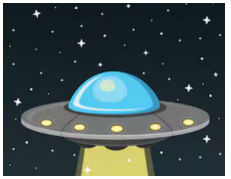

Important concepts to remember
- Missing data: dropna() and notnull()
- Types: astype()
- Stratified sampling: train_test_split(X, y, stratify=y)

In [ ]:
#Example
# Check the column types
print(ufo.dtypes)

# Change the type of seconds to float
ufo["seconds"] = ufo["seconds"].astype("float")

# Change the date column to type datetime
ufo["date"] = pd.to_datetime(ufo["date"])

# Check the column types
print(ufo[["seconds", "date"]].dtypes)

In [ ]:
#Example
# Check how many values are missing in the length_of_time, state, and type columns
print(ufo[["length_of_time", "state", "type"]].isnull().sum())

# Keep only rows where length_of_time, state, and type are not null
ufo_no_missing = ufo[ufo.length_of_time.notnull() & 
          ufo.state.notnull() & 
          ufo.type.notnull()]

# Print out the shape of the new dataset
print(ufo_no_missing.shape)

### Categorical variables and standardization 

Categorical variables

In [ ]:
# tate country type
# 295 az us light
# 296 tx us formation
# 297 nv us fireball

- One-hot encoding: pd.get_dummies()

Standardization
- var()
- np.log()

In [ ]:
#Example
def return_minutes(time_string):

    # Use \d+ to grab digits
    pattern = re.compile(r"\d+")
    
    # Use match on the pattern and column
    num = re.match(pattern, time_string)
    if num is not None:
        return int(num.group(0))
        
# Apply the extraction to the length_of_time column
ufo["minutes"] = ufo["length_of_time"].apply(lambda x: return_minutes(x))

# Take a look at the head of both of the columns
print(ufo[["length_of_time", "minutes"]].head())

# <script.py> output:
#         length_of_time  minutes
#     2  about 5 minutes      NaN
#     4       10 minutes     10.0
#     7        2 minutes      2.0
#     8        2 minutes      2.0
#     9        5 minutes      5.0

In [ ]:
#Example
# Check the variance of the seconds and minutes columns
print(ufo[["seconds", "minutes"]].var())

# Log normalize the seconds column
ufo["seconds_log"] = np.log(ufo.seconds)

# Print out the variance of just the seconds_log column
print(ufo.seconds_log.var())

# <script.py> output:
#     seconds    424087.417474
#     minutes       117.546372
#     dtype: float64
#     1.1223923881183004

### Engineering new features 

UFO feature engineering
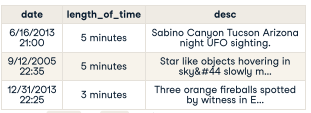

- Dates: .month or .hour attributes
- Regex: \d and .group()
- Text: tf-idf and TfidfVectorizer

In [ ]:
#Example
# Use Pandas to encode us values as 1 and others as 0
ufo["country_enc"] = ufo["country"].apply(lambda val: 1 if val == "us" else 0)

# Print the number of unique type values
print(len(ufo.type.unique()))

# Create a one-hot encoded set of the type values
type_set = pd.get_dummies(ufo.type)

# Concatenate this set back to the ufo DataFrame
ufo = pd.concat([ufo, type_set], axis=1)

# <script.py> output:
#     21

In [ ]:
#Example
# Look at the first 5 rows of the date column
print(ufo.date.head())

# Extract the month from the date column
ufo["month"] = ufo["date"].apply(lambda x: x.month)

# Extract the year from the date column
ufo["year"] = ufo["date"].apply(lambda y: y.year)

# Take a look at the head of all three columns
print(ufo[["date", "month", "year"]].head())

# <script.py> output:
#     0   2002-11-21 05:45:00
#     1   2012-06-16 23:00:00
#     2   2013-06-09 00:00:00
#     3   2013-04-26 23:27:00
#     4   2013-09-13 20:30:00
#     Name: date, dtype: datetime64[ns]
#                      date  month  year
#     0 2002-11-21 05:45:00     11  2002
#     1 2012-06-16 23:00:00      6  2012
#     2 2013-06-09 00:00:00      6  2013
#     3 2013-04-26 23:27:00      4  2013
#     4 2013-09-13 20:30:00      9  2013

In [ ]:
#Example
# Take a look at the head of the desc field
print(ufo.desc.head())

# Create the tfidf vectorizer object
vec = TfidfVectorizer()

# Use vec's fit_transform method on the desc field
desc_tfidf = vec.fit_transform(ufo.desc)

# Look at the number of columns this creates
print(desc_tfidf.shape)

# <script.py> output:
#     0    It was a large&#44 triangular shaped flying ob...
#     1    Dancing lights that would fly around and then ...
#     2    Brilliant orange light or chinese lantern at o...
#     3    Bright red light moving north to north west fr...
#     4    North-east moving south-west. First 7 or so li...
#     Name: desc, dtype: object
#     (1866, 3422)

### Feature selection and modeling 

Feature selection and modeling
- Redundant features
- Text vector

Final thoughts
- Iterative processes
- Know your dataset
- Understand your modeling task

In [ ]:
#Example
# Check the correlation between the seconds, seconds_log, and minutes columns
print(ufo[["seconds", "seconds_log", "minutes"]].corr())

# Make a list of features to drop
to_drop = ["city", "country", "lat", "long", "state","date", "recorded", "desc", "seconds", "minutes", "length_of_time"]

# Drop those features
ufo_dropped = ufo.drop(to_drop, axis = 1)

# Let's also filter some words out of the text vector we created
filtered_words = words_to_filter(vocab, vec.vocabulary_, desc_tfidf, 4)

# <script.py> output:
#                   seconds  seconds_log   minutes
#     seconds      1.000000     0.853371  0.980341
#     seconds_log  0.853371     1.000000  0.824493
#     minutes      0.980341     0.824493  1.000000

In [ ]:
#Example
# Take a look at the features in the X set of data
print(X.columns)

# Split the X and y sets using train_test_split, setting stratify=y
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify = y)

# Fit knn to the training sets
knn.fit(train_X, train_y)

# Print the score of knn on the test sets
print(knn.score(test_X, test_y))

# <script.py> output:
#     Index(['seconds_log', 'changing', 'chevron', 'cigar', 'circle', 'cone',
#            'cross', 'cylinder', 'diamond', 'disk', 'egg', 'fireball', 'flash',
#            'formation', 'light', 'other', 'oval', 'rectangle', 'sphere',
#            'teardrop', 'triangle', 'unknown', 'month', 'year'],
#           dtype='object')
#     0.8693790149892934

In [ ]:
#Example
# Use the list of filtered words we created to filter the text vector
filtered_text = desc_tfidf[:, list(filtered_words)]

# Split the X and y sets using train_test_split, setting stratify=y 
train_X, test_X, train_y, test_y = train_test_split(filtered_text.toarray(), y, stratify = y)

# Fit nb to the training sets
nb.fit(train_X, train_y)

# Print the score of nb on the test sets
nb.score(test_X, test_y)
#0.16274089935760172


### Congratulations 

# Feature Engineering for Machine Learning in Python 

## Creating Features

### Why generate features? 

Feature Engineering
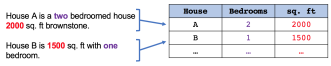

Different types of data (assumptions that will be in a certain format, normal distributed etc)
- Continuous: either integers (or whole numbers) or floats (decimals)
- Categorical: one of a limited set of values, e.g. gender, country of birth
- Ordinal: ranked values, often with no detail of distance between them
- Boolean: True/False values
- Datetime: dates and times

Course structure
- Chapter 1: Feature creation and extraction
- Chapter 2: Engineering messy data
- Chapter 3: Feature normalization
- Chapter 4: Working with text features

Pandas

In [ ]:
import pandas as pd
df = pd.read_csv(path_to_csv_file)
print(df.head())

Dataset

In [ ]:
# SurveyDate \
# 0 2018-02-28 20:20:00
# 1 2018-06-28 13:26:00
# 2 2018-06-06 03:37:00
# 3 2018-05-09 01:06:00
# 4 2018-04-12 22:41:00
        
# FormalEducation
# 0 Bachelor's degree (BA. BS. B.Eng.. etc.)
# 1 Bachelor's degree (BA. BS. B.Eng.. etc.)
# 2 Bachelor's degree (BA. BS. B.Eng.. etc.)
# 3 Some college/university study ...
# 4 Bachelor's degree (BA. BS. B.Eng.. etc.)

Column names

In [ ]:
print(df.columns)
# Index(['SurveyDate','FormalEducation',
# 'ConvertedSalary','Hobby','Country',
# 'StackOverflowJobsRecommend','VersionControl',
# 'Age','Years Experience','Gender','RawSalary'], dtype='object')

Column types

In [ ]:
print(df.dtypes)
# SurveyDate object
# FormalEducation object
# ConvertedSalary float64
# ...
# Years Experience int64
# Gender object
# RawSalary object
# dtype: object --> contain strings

Selecting specific data types

In [ ]:
only_ints = df.select_dtypes(include=['int'])
print(only_ints.columns)
# Index(['Age', 'Years Experience'], dtype='object')

In [ ]:
#Example
# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
print(so_survey_df.head())

# Print the data type of each column
print(so_survey_df.dtypes)

In [ ]:
#Example
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=[int, "float"])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

# <script.py> output:
#     Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age', 'Years Experience'], dtype='object')

### Dealing with categorical features 

Encoding categorical features
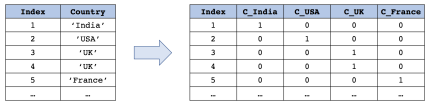

Encoding categorical features
- One-hot encoding
- Dummy encoding

One-hot encoding

In [ ]:
pd.get_dummies(df, columns=['Country'], #get dummies is one-hot encoding
               prefix='C') # improve readability 
# C_France C_India C_UK C_USA
# 0 0 1 0 0
# 1 0 0 0 1
# 2 0 0 1 0
# 3 0 0 1 0
# 4 1 0 0 0

Dummy encoding

In [ ]:
pd.get_dummies(df, columns = ["Country"],
               drop_fist = True, prefix = "C")
# C_India C_UK C_USA
# 0 1 0 0
# 1 0 0 1
# 2 0 1 0
# 3 0 1 0
# 4 0 0 0

One-hot vs. dummies
- One-hot encoding: Explainable features
- Dummy encoding: Necessary information without duplication
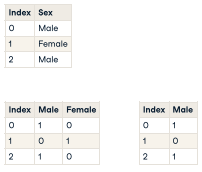

Limiting your columns

In [ ]:
counts = df['Country'].value_counts() #instead of creating several ones, use only the most frequent
print(counts)
# 'USA' 8
# 'UK' 6
# 'India' 2
# 'France' 1
# Name: Country, dtype: object

In [ ]:
mask = df['Country'].isin(counts[counts < 5].index) #seleciona o index de counts que é menor do que 5
df['Country'][mask] = 'Other' #substitui com base no max
print(pd.value_counts(colors))
# 'USA' 8
# 'UK' 6
# 'Other' 3
# Name: Country, dtype: object

In [ ]:
#Example
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)
# <script.py> output:
#     Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby', 'StackOverflowJobsRecommend', 'VersionControl', 'Age', 'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
#            'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden', 'OH_UK', 'OH_USA', 'OH_Ukraine'],
#           dtype='object')


# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=["Country"], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)
# <script.py> output:
#     Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby', 'StackOverflowJobsRecommend', 'VersionControl', 'Age', 'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
#            'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK', 'DM_USA', 'DM_Ukraine'],
#           dtype='object')

In [ ]:
#Example
# Create a series out of the Country column
countries = so_survey_df.Country

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

# <script.py> output:
#     South Africa    166
#     USA             164
#     Spain           134
#     Sweeden         119
#     France          115
#     Russia           97
#     UK               95
#     India            95
#     Ukraine           9
#     Ireland           5
#     Name: Country, dtype: int64

In [ ]:
#Example

# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts<10].index)

# Print the top 5 rows in the mask series
print(mask.head())

# <script.py> output:
#     0    False
#     1    False
#     2    False
#     3    False
#     4    False
#     Name: Country, dtype: bool

In [ ]:
#Example
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())

# <script.py> output:
#     South Africa    166
#     USA             164
#     Spain           134
#     Sweeden         119
#     France          115
#     Russia           97
#     UK               95
#     India            95
#     Other            14
#     Name: Country, dtype: int64

### Numeric variables 

Types of numeric features
- Age
- Price
- Counts
- Geospatial data (coordinates)

Does size matter?
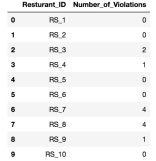

Binarizing numeric variables

In [ ]:
df['Binary_Violation'] = 0
df.loc[df['Number_of_Violations'] > 0,
       'Binary_Violation'] = 1

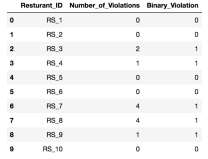

Binning numeric variables

In [ ]:
import numpy as np
df['Binned_Group'] = pd.cut(
    df['Number_of_Violations'],
    bins=[-np.inf, 0, 2, np.inf],
    labels=[1, 2, 3] #create different bins - group 2 is 1 and 2
)

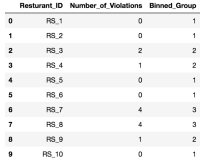

In [ ]:
#Example
# Create the Paid_Job column filled with zeros
so_survey_df["Paid_Job"] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df.ConvertedSalary > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

# <script.py> output:
#        Paid_Job  ConvertedSalary
#     0         0              0.0
#     1         1          70841.0
#     2         0              0.0
#     3         1          21426.0
#     4         1          41671.0

In [ ]:
#Example
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins = 5)

# Print the first 5 rows of the equal_binned column
print(so_survey_df[['equal_binned', 'ConvertedSalary']].head())

# <script.py> output:
#               equal_binned  ConvertedSalary
#     0  (-2000.0, 400000.0]              0.0
#     1  (-2000.0, 400000.0]          70841.0
#     2  (-2000.0, 400000.0]              0.0
#     3  (-2000.0, 400000.0]          21426.0
#     4  (-2000.0, 400000.0]          41671.0

In [ ]:
#Example
# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins = bins, labels = labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

# <script.py> output:
#       boundary_binned  ConvertedSalary
#     0        Very low              0.0
#     1          Medium          70841.0
#     2        Very low              0.0
#     3             Low          21426.0
#     4             Low          41671.0

## Dealing with Messy Data 

### Why do missing values exist? 

How gaps in data occur
- Data not being collected properly
- Collection and management errors
- Data intentionally being omitted
- Could be created due to transformations of the data

Why we care?
- Some models cannot work with missing data (Nulls/NaNs)
- Missing data may be a sign of a wider data issue
- Missing data can be a useful feature

Missing value discovery

In [ ]:
print(df.info()) #preliminary look of completeness

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 999 entries, 0 to 998
# Data columns (total 12 columns):
# SurveyDate 999 non-null object
# ...
# StackOverflowJobsRecommend 487 non-null float64
# VersionControl 999 non-null object
# Gender 693 non-null object
# RawSalary 665 non-null object
# dtypes: float64(2), int64(2), object(8)
# memory usage: 93.7+ KB

Finding missing values

In [ ]:
print(df.isnull())

# StackOverflowJobsRecommend VersionControl ... \
# 0 True False ...
# 1 False False ...
# 2 False False ...
# 3 True False ...
# 4 False False ...

# Gender RawSalary
# 0 False True
# 1 False False
# 2 True True
# 3 False False
# 4 False False

In [ ]:
print(df['StackOverflowJobsRecommend'].isnull().sum())
# 512

In [ ]:
print(df.notnull())

# StackOverflowJobsRecommend VersionControl ... \
# 0 False True ...
# 1 True True ...
# 2 True True ...
# 3 False True ...
# 4 True True ...

# Gender RawSalary
# 0 True False
# 1 True True
# 2 False False
# 3 True True
# 4 True True

In [ ]:
# Subset the DataFrame
sub_df = so_survey_df[["Age", "Gender"]]

# Print the number of non-missing values
print(sub_df.notnull().sum())

# <script.py> output:
#     Age       999
#     Gender    693
#     dtype: int64

In [ ]:
# Print the locations of the missing values
print(sub_df.head(10).isna())

# Print the locations of the non-missing values
print(sub_df.head(10).notna())

### Dealing with missing values (I) 

Listwise deletion

In [ ]:
#    SurveyDate ConvertedSalary  Hobby ... \
# 0 2/28/18 20:20      NaN        Yes ...
# 1 6/28/18 13:26      70841.0    Yes ...
# 2 6/6/18 3:37        NaN         No ...
# 3 5/9/18 1:06        21426.0    Yes ...
# 4 4/12/18 22:41      41671.0    Yes ...

Listwise deletion (complete case analysis) in Python

In [ ]:
# Drop all rows with at least one missing values
df.dropna(how='any')

In [ ]:
# Drop rows with missing values in a specific column
df.dropna(subset=['VersionControl'])

Issues with deletion
- It deletes valid data points
- Relies on randomness
- Reduces information

Replacing with strings

In [ ]:
# Replace missing values in a specific column
# with a given string
df['VersionControl'].fillna(
    value='None Given', inplace=True
)

Recording missing values

In [ ]:
# Record where the values are not missing
df['SalaryGiven'] = df['ConvertedSalary'].notnull()

# Drop a specific column
df.drop(columns=['ConvertedSalary'])

#only takes the cells not null and drop the original

In [ ]:
#Example
# Print the number of rows and columns
print(so_survey_df.shape)
# <script.py> output:
#     (999, 11)


# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how = "any")

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)
# <script.py> output:
#     (264, 11)


# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how = "any", axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)
# <script.py> output:
#     (999, 7)


# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset = ["Gender"])

# Print the shape of the new DataFrame
print(no_gender.shape)
# <script.py> output:
#     (693, 11)

In [ ]:
#Example
# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())
# <script.py> output:
#     Male                                                                         632
#     Female                                                                        53
#     Female;Male                                                                    2
#     Transgender                                                                    2
#     Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
#     Male;Non-binary. genderqueer. or gender non-conforming                         1
#     Non-binary. genderqueer. or gender non-conforming                              1
#     Female;Transgender                                                             1
#     Name: Gender, dtype: int64

# Replace missing values
so_survey_df['Gender'].fillna(value = "Not Given", inplace = True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())
# <script.py> output:
#     Male                                                                         632
#     Not Given                                                                    306
#     Female                                                                        53
#     Female;Male                                                                    2
#     Transgender                                                                    2
#     Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
#     Male;Non-binary. genderqueer. or gender non-conforming                         1
#     Non-binary. genderqueer. or gender non-conforming                              1
#     Female;Transgender                                                             1
#     Name: Gender, dtype: int64

### Dealing with missing values (II) 

Deleting missing values
- Can't delete rows with missing values in the test set

What else can you do?
- Categorical columns: Replace missing values with the most common occurring value or with a string that flags missing values such as 'None'
- Numeric columns: Replace missing values with a suitable value

Measures of central tendency (bias estimates of variances and covariances of the features). metrics should be calculated before the inputation
- Mean
- Median

Calculating the measures of central tendency

In [ ]:
print(df['ConvertedSalary'].mean())
print(df['ConvertedSalary'].median())
# 92565.16992481203
# 55562.0

Fill the missing values

In [ ]:
df['ConvertedSalary'] = df['ConvertedSalary'].fillna(
    df['ConvertedSalary'].mean()
)

df['ConvertedSalary'] = df['ConvertedSalary']\
                        .astype('int64') #eliminate decimals place

Rounding values

In [ ]:
df['ConvertedSalary'] = df['ConvertedSalary'].fillna(
    round(df['ConvertedSalary'].mean()) #round before transforming
)

In [ ]:
#Example
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df.StackOverflowJobsRecommend.head())
# <script.py> output:
#     0    NaN
#     1    7.0
#     2    8.0
#     3    NaN
#     4    8.0
#     Name: StackOverflowJobsRecommend, dtype: float64

# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(so_survey_df['StackOverflowJobsRecommend'].head())

# <script.py> output:
#     0    7.0
#     1    7.0
#     2    8.0
#     3    7.0
#     4    8.0
#     Name: StackOverflowJobsRecommend, dtype: float64

Question: Imputing values in predictive models
- When working with predictive models you will often have a separate train and test DataFrames. In these cases you want to ensure no information from your test set leaks into your train set. When filling missing values in data to be used in these situations how should approach the two datasets?

Answer: 
- Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test sets.

### Dealing with other data issues 

Bad characters

In [ ]:
print(df['RawSalary'].dtype)
# dtype('O')

In [ ]:
print(df['RawSalary'].head())
# 0 NaN
# 1 70,841.00
# 2 NaN
# 3 21,426.00
# 4 41,671.00
# Name: RawSalary, dtype: object

Dealing with bad characters

In [ ]:
df['RawSalary'] = df['RawSalary'].str.replace(',','')
df['RawSalary'] = df['RawSalary'].astype('float')

#if there is any other characters, it is an stray character

Finding other stray characters

In [ ]:
#doing this will put all cell errors into nan
coerced_vals = pd.to_numeric(df['RawSalary'], errors='coerce') 

In [ ]:
print(df[coerced_vals.isna()].head())
# 0 NaN
# 2 NaN
# 4 $51408.00
# Name: RawSalary, dtype: object

Chaining methods

In [ ]:
df['column_name'] = df['column_name'].method1()
df['column_name'] = df['column_name'].method2()
df['column_name'] = df['column_name'].method3()

# Same as:
df['column_name'] = df['column_name']\
                    .method1().method2().method3()

In [ ]:
#Example
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace("$", "")

In [ ]:
#Example
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isna()

# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

# <script.py> output:
#     0            NaN
#     2            NaN
#     4      £41671.00
#     6            NaN
#     8            NaN
#              ...    
#     989          NaN
#     990          NaN
#     992          NaN
#     994          NaN
#     997          NaN
#     Name: RawSalary, Length: 401, dtype: object

# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace("£", "")

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype("float")

# Print the column
print(so_survey_df['RawSalary'])
# <script.py> output:
#     0            NaN
#     1        70841.0
#     2            NaN
#     3        21426.0
#     4        41671.0
#              ...    
#     994          NaN
#     995      58746.0
#     996      55000.0
#     997          NaN
#     998    1000000.0
#     Name: RawSalary, Length: 999, dtype: float64

In [1]:
#Example
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(",","")\
                              .str.replace("$", "")\
                              .str.replace("£", "")\
                              .astype("float")
 
# Print the RawSalary column
print(so_survey_df['RawSalary'])
#same output as before

## Conforming to Statistical Assumptions 

### Data distributions 

Distribution assumptions
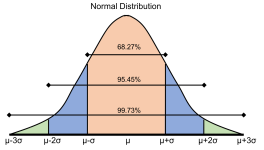

Observing your data

In [ ]:
import matplotlib as plt

df.hist()
plt.show() #(almost normal and long right tail)

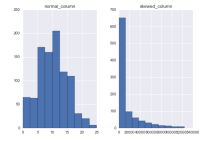

Delving deeper with box plots
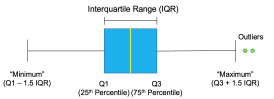

Box plots in pandas

In [ ]:
df[['column_1']].boxplot()
plt.show()

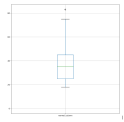

Paring distributions

In [ ]:
import seaborn as sns
sns.pairplot(df)

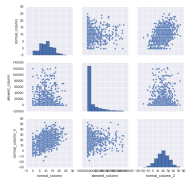

Further details on your distributions

In [ ]:
df.describe()

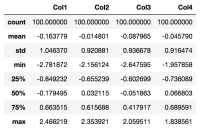

In [ ]:
#Example
# Create a histogram
so_numeric_df.hist()
plt.show()

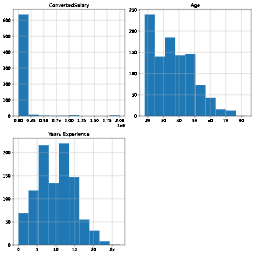

In [ ]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

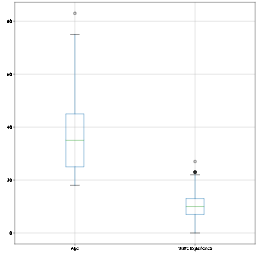

In [ ]:
# Create a boxplot of ConvertedSalary
so_numeric_df[["ConvertedSalary"]].boxplot()
plt.show()

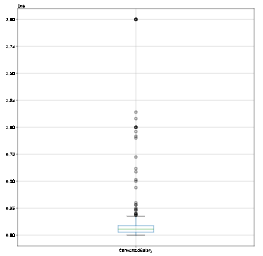

In [ ]:
# Import packages
from matplotlib import pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

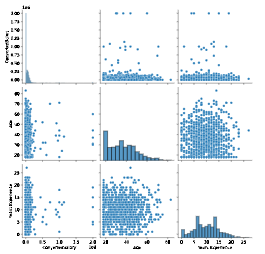b

In [ ]:
# Print summary statistics
print(so_numeric_df.describe())

# <script.py> output:
#            ConvertedSalary      Age  Years Experience
#     count        9.990e+02  999.000           999.000
#     mean         6.162e+04   36.003             9.962
#     std          1.761e+05   13.255             4.878
#     min          0.000e+00   18.000             0.000
#     25%          0.000e+00   25.000             7.000
#     50%          2.712e+04   35.000            10.000
#     75%          7.000e+04   45.000            13.000
#     max          2.000e+06   83.000            27.000

OBS: decision trees do not have to normalize data --> "Correct! As decision trees split along a singular point, they do not require all the columns to be on the same scale."

### Scaling and transformations 

Scaling data
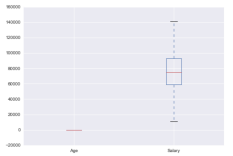

Min-Max scaling (normalizaton) - values change, but not the distribution
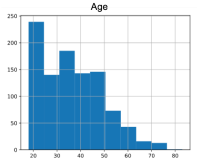
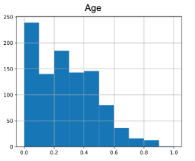

Min-Max scaling in Python

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #instantiate the minmaxscaler
scaler.fit(df[['Age']])
df['normalized_age'] = scaler.transform(df[['Age']])

Standardization
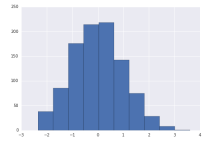

Standardization in Python

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['Age']])
df['standardized_col'] = scaler\
                        .transform(df[['Age']])

Log Transformation
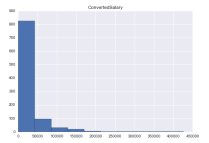

Log transformation in Python

In [ ]:
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
log.fit(df[['ConvertedSalary']])
df['log_ConvertedSalary'] = 
     log.transform(df[['ConvertedSalary']])

In [ ]:
#Example
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

<script.py> output:
       Age_MM  Age
    0   0.046   21
    1   0.308   38
    2   0.415   45
    3   0.431   46
    4   0.323   39

In [ ]:
#Example
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())
<script.py> output:
       Age_SS  Age
    0  -1.132   21
    1   0.151   38
    2   0.679   45
    3   0.755   46
    4   0.226   39

In [ ]:
#Example
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[["ConvertedSalary"]])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

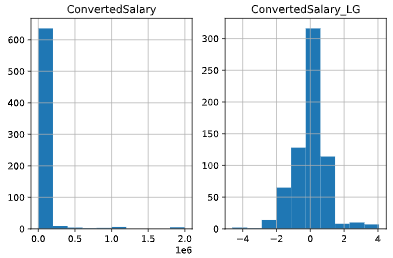

### Removig outliers 

What are outliers?
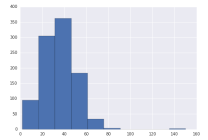

Quantile based detection (remove a certain percentage - important when extreme values should be avoided)
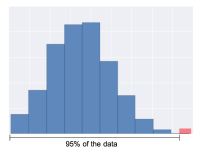

Quantiles in Python

In [ ]:
q_cutoff = df['col_name'].quantile(0.95)
mask = df['col_name'] < q_cutoff
trimmed_df = df[mask]

Standard deviation based detection
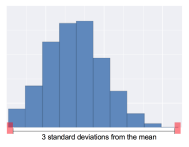

Standard deviation detection in Python

In [ ]:
mean = df['col_name'].mean()
std = df['col_name'].std()
cut_off = std * 3

#identify upper and lower bound
lower, upper = mean - cut_off, mean + cut_off
new_df = df[(df['col_name'] < upper) &(df['col_name'] > lower)]

In [ ]:
#Example
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

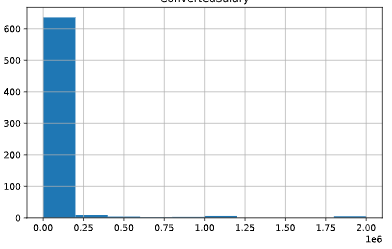
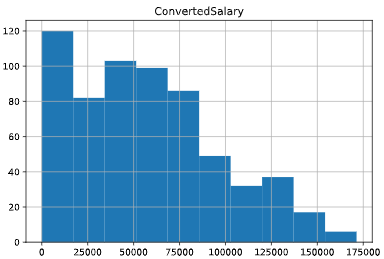

In [ ]:
#Example
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper)  
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

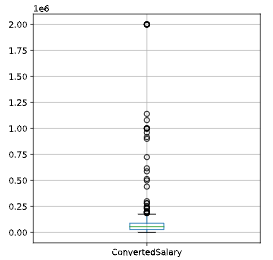
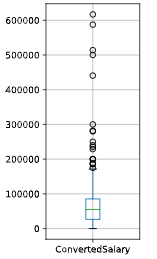

### Scaling and transforming new data

Reuse training scalers

In [ ]:
scaler = StandardScaler()
scaler.fit(train[['col']])
train['scaled_col'] = scaler.transform(train[['col']])
# FIT SOME MODEL
# ....
test = pd.read_csv('test_csv')
test['scaled_col'] = scaler.transform(test[['col']])

Training transformations for reuse

In [ ]:
train_mean = train[['col']].mean()
train_std = train[['col']].std()

cut_off = train_std * 3
train_lower = train_mean - cut_off
train_upper = train_mean + cut_off

# Subset train data
test = pd.read_csv('test_csv')

# Subset test data
test = test[(test[['col']] < train_upper) &(test[['col']] > train_lower)]

Why only use training data?
- Data leakage: Using data that you won't have access to when
assessing the performance of your model

In [ ]:
#Example
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[["Age"]])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[["Age"]])
print(so_test_numeric[['Age', 'Age_ss']].head())

<script.py> output:
         Age  Age_ss
    700   35  -0.069
    701   18  -1.343
    702   47   0.830
    703   57   1.579
    704   41   0.380

In [ ]:
#Example
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

## Dealing with Text Data 

### Encoding text 

Standardizing your text
- Example of free text:
    - Fellow-Citizens of the Senate and of the House of
    - Representatives: AMONG the vicissitudes incident to life no
    - event could have lled me with greater anxieties than that of
    - which the notication was transmied by your order, and
    - received on the th day of the present month.

Dataset

In [ ]:
print(speech_df.head())

# Name               Inaugural           Address \
# 0 George Washington First Inaugural Address
# 1 George Washington Second Inaugural Address
# 2 John Adams Inaugural Address
# 3 Thomas Jefferson First Inaugural Address
# 4 Thomas Jefferson Second Inaugural Address
# Date                               text
# 0 Thursday, April 30, 1789 Fellow-Citizens of the Sena...
# 1 Monday, March 4, 1793 Fellow Citizens: I AM again...
# 2 Saturday, March 4, 1797 WHEN it was first perceived...
# 3 Wednesday, March 4, 1801 Friends and Fellow-Citizens...
# 4 Monday, March 4, 1805 PROCEEDING, fellow-citizens...

Removing unwanted characters
- [a-zA-Z] : All letter characters
- [^a-zA-Z] : All non letter characters (punctuation)

In [ ]:
speech_df['text'] = speech_df['text']\
                    .str.replace('[^a-zA-Z]',' ') #using regex to remove no letter patterns to white space
#^ -> negativa

Removing unwanted characters

- Before:
    - "Fellow-Citizens of the Senate and of the House of
    - Representatives: AMONG the vicissitudes incident to
    - life no event could have filled me with greater"
    - ...

- After:
    - "Fellow Citizens of the Senate and of the House of
    - Representatives AMONG the vicissitudes incident to
    - life no event could have filled me with greater"
    - ...

Standardize the case

In [ ]:
speech_df['text'] = speech_df['text'].str.lower()

print(speech_df['text'][0])
# "fellow citizens of the senate and of the house of
# representatives among the vicissitudes incident to
# life no event could have filled me with greater"
# ...

Length of text

In [ ]:
speech_df['char_cnt'] = speech_df['text'].str.len() #.str.len() conta os caracteres? e os espaços?

print(speech_df['char_cnt'].head()) #quantidade de characteres em cada discurso
# 0 1889
# 1 806
# 2 2408
# 3 1495
# 4 2465
# Name: char_cnt, dtype: int64

Word counts

In [ ]:
speech_df['word_cnt'] =speech_df['text'].str.split()

speech_df['word_cnt'].head(1)
# ['fellow','citizens','of','the','senate','and',...

In [ ]:
speech_df['word_counts'] =speech_df['text'].str.split().str.len() #separa em uma lista por palavra, sem espaço

print(speech_df['word_splits'].head()) #quantidade de palavras
# 0 1432
# 1 135
# 2 2323
# 3 1736
# 4 2169
# Name: word_cnt, dtype: int64

Average length of word

In [ ]:
speech_df['avg_word_len'] =
        speech_df['char_cnt'] / speech_df['word_cnt']

In [ ]:
#Example
# Print the first 5 rows of the text column
print(speech_df.text.head())

# <script.py> output:
#     0    Fellow-Citizens of the Senate and of the House...
#     1    Fellow Citizens:  I AM again called upon by th...
#     2    WHEN it was first perceived, in early times, t...
#     3    Friends and Fellow-Citizens:  CALLED upon to u...
#     4    PROCEEDING, fellow-citizens, to that qualifica...
#     Name: text, dtype: object

# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

# <script.py> output:
#     0    fellow citizens of the senate and of the house...
#     1    fellow citizens   i am again called upon by th...
#     2    when it was first perceived  in early times  t...
#     3    friends and fellow citizens   called upon to u...
#     4    proceeding  fellow citizens  to that qualifica...
#     Name: text_clean, dtype: object

In [ ]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df["char_cnt"] / speech_df["word_cnt"]

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

# <script.py> output:
#                                                text_clean  char_cnt  word_cnt  avg_word_length
#     0   fellow citizens of the senate and of the house...      8616      1432            6.017
#     1   fellow citizens   i am again called upon by th...       787       135            5.830
#     2   when it was first perceived  in early times  t...     13871      2323            5.971
#     3   friends and fellow citizens   called upon to u...     10144      1736            5.843
#     4   proceeding  fellow citizens  to that qualifica...     12902      2169            5.948
#     5   unwilling to depart from examples of the most ...      7003      1179            5.940

### Word counts 

Text to columns
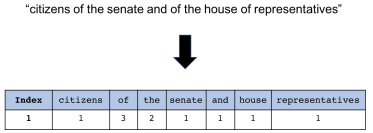

Initializing the vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

print(cv)
# CountVectorizer(analyzer=u'word', binary=False,
#                 decode_error=u'strict',
#                 dtype=<type 'numpy.int64'>,
#                 encoding=u'utf-8', input=u'content',
#                 lowercase=True, max_df=1.0, max_features=None,
#                 min_df=1,ngram_range=(1, 1), preprocessor=None,
#                 stop_words=None, strip_accents=None,
#                 token_pattern=u'(?u)\\b\\w\\w+\\b',
#                 tokenizer=None, vocabulary=None

Specifying the vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.1, max_df=0.9) #deve aparecer em 10% dos documentos ou 90%

- min_df : minimum fraction of documents the word must occur in 
- max_df : maximum fraction of documents the word can occur in

Fit the vectorize

In [ ]:
cv.fit(speech_df['text_clean'])

Transforming your text

In [ ]:
cv_transformed = cv.transform(speech_df['text_clean'])
print(cv_transformed)
# <58x8839 sparse matrix of type '<type 'numpy.int64'>'

In [ ]:
cv_transformed.toarray()

Getting the features

In [ ]:
feature_names = cv.get_feature_names()
print(feature_names)
# [u'abandon'
# , u'abandoned'
# , u'abandonment'
# , u'abate'
# ,
# u'abdicated'
# , u'abeyance'
# , u'abhorring'
# , u'abide'
# ,
# u'abiding'
# , u'abilities'
# , u'ability'
# , u'abject'
# ...

Fitting and transforming

In [ ]:
cv_transformed = cv.fit_transform(speech_df['text_clean']
print(cv_transformed)
   
# <58x8839 sparse matrix of type '<type 'numpy.int64'>'

Putting it all together

In [ ]:
cv_df = pd.DataFrame(cv_transformed.toarray(),
                     columns=cv.get_feature_names())\
                                .add_prefix('Counts_')
print(cv_df.head())
# Counts_aback Counts_abandoned Counts_a...
# 0                  1              0 ...
# 1                  0              0 ...
# 2                  0              1 ...
# 3                  0              1 ...
# 4                  0              0 ...
        
# ```out Counts_aback Counts_abandon Counts_abandonment 0 1 0 0 1 0 0 1
# 2 0 1 0 3 0 1 0 4 0 0 0 ```

Updating your DataFrame

In [ ]:
speech_df = pd.concat([speech_df, cv_df],
                      axis=1, sort=False)
print(speech_df.shape)
(58, 8845)

In [ ]:
#Example
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names())

# <script.py> output:
#     ['abandon', 'abandoned', 'abandonment', etc...]

In [ ]:
#Example
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)

# <script.py> output:
#     [[0 0 0 ... 0 0 0]
#      [0 0 0 ... 0 0 0]
#      [0 1 0 ... 0 0 0]
#      ...
#      [0 1 0 ... 0 0 0]
#      [0 0 0 ... 0 0 0]
#      [0 0 0 ... 0 0 0]]

# <script.py> output:
#     (58, 9043)

In [ ]:
#Example
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df = 0.2, max_df = 0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)
# <script.py> output:
#     (58, 818)

In [ ]:
#Example
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

# <script.py> output:
#                     Name         Inaugural Address                      Date                                               text                                         text_clean  ...  Counts_years  \
#     0  George Washington   First Inaugural Address  Thursday, April 30, 1789  Fellow-Citizens of the Senate and of the House...  fellow citizens of the senate and of the house...  ...             1   
#     1  George Washington  Second Inaugural Address     Monday, March 4, 1793  Fellow Citizens:  I AM again called upon by th...  fellow citizens   i am again called upon by th...  ...             0   
#     2         John Adams         Inaugural Address   Saturday, March 4, 1797  WHEN it was first perceived, in early times, t...  when it was first perceived  in early times  t...  ...             3   
#     3   Thomas Jefferson   First Inaugural Address  Wednesday, March 4, 1801  Friends and Fellow-Citizens:  CALLED upon to u...  friends and fellow citizens   called upon to u...  ...             0   
#     4   Thomas Jefferson  Second Inaugural Address     Monday, March 4, 1805  PROCEEDING, fellow-citizens, to that qualifica...  proceeding  fellow citizens  to that qualifica...  ...             2   
    
#        Counts_yet  Counts_you  Counts_young  Counts_your  
#     0           0           5             0            9  
#     1           0           0             0            1  
#     2           0           0             0            1  
#     3           2           7             0            7  
#     4           2           4             0            4  
    
#     [5 rows x 826 columns]

### Term frequency-inverse document frequency

Introducing TF-IDF

In [ ]:
print(speech_df['Counts_the'].head())
# 0 21
# 1 13
# 2 29
# 3 22
# 4 20

TF-IDF (way to normalize so words that do not appear in many documents are more important)
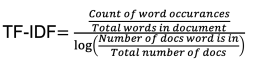

Importing the vectorizer


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
print(tv)
#no slide esta comido mesmo
# TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u
#                 dtype=<type 'numpy.float64'>, encoding=u'utf-8', input
#                 lowercase=True, max_df=1.0, max_features=None, min_df=
#                 ngram_range=(1, 1), norm=u'l2', preprocessor=None, smo
#                 stop_words=None, strip_accents=None, sublinear_tf=Fals
#                 token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, us
#                 vocabulary=None)

Max features and stopwords

In [ ]:
tv = TfidfVectorizer(max_features=100,
                     stop_words='english')

- max_features : Maximum number of columns created from TF-IDF
- stop_words : List of common words to omit e.g. "and","the" etc. (predefined list or use other python libraries)

Fitting your text

In [ ]:
tv.fit(train_speech_df['text'])
train_tv_transformed = tv.transform(train_speech_df['text'])

Putting it all together

In [ ]:
train_tv_df = pd.DataFrame(train_tv_transformed.toarray(),
                           columns=tv.get_feature_names())\
                                    .add_prefix('TFIDF_')

train_speech_df = pd.concat([train_speech_df, train_tv_df],
                            axis=1, sort=False)

Inspecting your transforms

In [ ]:
examine_row = train_tv_df.iloc[0] #pega a primeira linha e ordena os maiores valores
print(examine_row.sort_values(ascending=False))
# TFIDF_government 0.367430
# TFIDF_public 0.333237
# TFIDF_present 0.315182
# TFIDF_duty 0.238637
# TFIDF_citizens 0.229644
# Name: 0, dtype: float64

Applying the vectorizer to new data

In [ ]:
#faz a mesma coisa no 
test_tv_transformed = tv.transform(test_df['text_clean'])

test_tv_df = pd.DataFrame(test_tv_transformed.toarray(),
                          columns=tv.get_feature_names())\
                            .add_prefix('TFIDF_')

test_speech_df = pd.concat([test_speech_df, test_tv_df],
                           axis=1, sort=False)

In [ ]:
#Example
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features = 100, stop_words = "english")

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

# <script.py> output:
#        TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  TFIDF_americans  ...  TFIDF_war  TFIDF_way  TFIDF_work  TFIDF_world  TFIDF_years
#     0         0.000                 0.133          0.000           0.105              0.0  ...      0.000      0.061       0.000        0.046        0.053
#     1         0.000                 0.261          0.266           0.000              0.0  ...      0.000      0.000       0.000        0.000        0.000
#     2         0.000                 0.092          0.157           0.073              0.0  ...      0.024      0.000       0.000        0.064        0.073
#     3         0.000                 0.093          0.000           0.000              0.0  ...      0.037      0.000       0.039        0.096        0.000
#     4         0.041                 0.040          0.000           0.031              0.0  ...      0.094      0.000       0.000        0.055        0.063
    
#     [5 rows x 100 columns]

In [ ]:
#Example
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

# <script.py> output:
#     TFIDF_government    0.367
#     TFIDF_public        0.333
#     TFIDF_present       0.315
#     TFIDF_duty          0.239
#     TFIDF_country       0.230
#     Name: 0, dtype: float64

In [ ]:
#Example
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df.text_clean)

# Transform test data
test_tv_transformed = tv.transform(test_speech_df.text_clean)

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

# <script.py> output:
#        TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  TFIDF_authority  ...  TFIDF_war  TFIDF_way  TFIDF_work  TFIDF_world  TFIDF_years
#     0         0.000                 0.030          0.234           0.083            0.000  ...      0.079      0.033       0.000        0.300        0.135
#     1         0.000                 0.000          0.547           0.037            0.000  ...      0.053      0.067       0.079        0.278        0.126
#     2         0.000                 0.000          0.127           0.135            0.000  ...      0.043      0.054       0.096        0.225        0.044
#     3         0.037                 0.067          0.267           0.031            0.040  ...      0.030      0.038       0.236        0.237        0.062
#     4         0.000                 0.000          0.222           0.157            0.028  ...      0.021      0.081       0.120        0.300        0.153
    
#     [5 rows x 100 columns]

### N_grams 

Issues with bag of words
- Positive meaning
    - Single word: happy
- Negative meaning
    - Bi-gram : not happy
- Positive meaning
    - Trigram : never not happy

Using N-grams

In [ ]:
tv_bi_gram_vec = TfidfVectorizer(ngram_range = (2,2))

# Fit and apply bigram vectorizer
tv_bi_gram = tv_bi_gram_vec\
                .fit_transform(speech_df['text'])

# Print the bigram features
print(tv_bi_gram_vec.get_feature_names())
# [u'american people'
# , u'best ability '
# ,
# u'beloved country'
# , u'best interests'
# ... ]

Finding common words

In [ ]:
# Create a DataFrame with the Counts features
tv_df = pd.DataFrame(tv_bi_gram.toarray(),
                     columns=tv_bi_gram_vec.get_feature_names())\
                     .add_prefix('Counts_')

tv_sums = tv_df.sum()
print(tv_sums.head())
# Counts_administration government 12
# Counts_almighty god 15
# Counts_american people 36
# Counts_beloved country 8
# Counts_best ability 8
# dtype: int64

In [ ]:
print(tv_sums.sort_values(ascending=False)).head()
# Counts_united states 152
# Counts_fellow citizens 97
# Counts_american people 36
# Counts_federal government 35
# Counts_self government 30
# dtype: int64

In [ ]:
#Example
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range = (3,3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

# <script.py> output:
#     ['ability preserve protect', 'agriculture commerce manufactures', etc..]

In [ ]:
#Example
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

# <script.py> output:
#     Counts_constitution united states    20
#     Counts_people united states          13
#     Counts_mr chief justice              10
#     Counts_preserve protect defend       10
#     Counts_president united states        8
#     dtype: int64

### Wrap-up

Chapter 1
- How to understand your data types
- Efficient encoding or categorical features
- Different ways to work with continuous variables

Chapter 2
- How to locate gaps in your data
- Best practices in dealing with the incomplete rows
- Methods to find and deal with unwanted characters

Chapter 3
- How to observe your data's distribution
- Why and how to modify this distribution
- Best practices of finding outliers and their removal

Chapter 4
- The foundations of word embeddings
- Usage of Term Frequency Inverse Document Frequency (Tfidf)
- N-grams and its advantages over bag of words

Next steps
- Kaggle competitions
- More DataCamp courses
- Your own project